Research has been conducted to demonstrate how gentrification leads to more 311 complaints in the 8 different wards of Washington D.C. These wards differ in dimensions, demographic composition, and density. The data exploration will focus of the association of household incomes and number of requests per ward. The CSV files used in this data exploration was gathered from the US Census Bureau. 

Research Question: Is there an association between average or median household income and the number of parking enforcement service requests?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
requests311 = pd.read_csv('_311requests.csv')
ward = pd.read_csv('WardIncome.csv')

In [6]:
requests311

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
0,-77.025344,38.925787,1804414,S0181,Illegal Dumping,Illegal Dumping,DPW,1,2014/01/01 18:29:52+00,2014/01/03 15:32:54+00,...,397802.5400,139767.3100,38.925780,-77.025342,WASHINGTON,DC,20001.0,232453.0,Ward 1,"Illegal Dumping\n780 Girard St., NW, Washingto..."
1,-77.062172,38.971404,1804415,S05SL,Streetlight Repair Investigation,TOA,DDOT,1,2014/01/01 18:12:04+00,2014/01/06 04:33:16+00,...,394612.5600,144832.7700,38.971397,-77.062170,WASHINGTON,DC,20015.0,260266.0,Ward 4,streetlight has been out for 3 days in front o...
2,-76.942566,38.880145,1804416,S05SL,Streetlight Repair Investigation,TOA,DDOT,1,2014/01/01 18:56:57+00,2014/01/05 22:33:06+00,...,404983.6500,134702.0000,38.880138,-76.942564,WASHINGTON,DC,20019.0,76629.0,Ward 7,streetlight has been out for 2 days
3,-77.038403,38.928094,1804417,S0031,Bulk Collection,Bulk Collection,DPW,1,2014/01/01 21:19:18+00,2014/01/09 12:57:00+00,...,396670.3000,140023.8300,38.928087,-77.038401,WASHINGTON,DC,20009.0,236329.0,Ward 1,NaN
4,-76.981009,38.879628,1804418,SIGNMISS,Sign Missing Investigation,Signs,DDOT,1,2014/01/01 21:23:19+00,2014/01/08 14:05:39+00,...,401648.0000,134643.1500,38.879620,-76.981007,WASHINGTON,DC,20003.0,80062.0,Ward 6,"The ""Road Closed"" sign for the old entrance to..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322969,-77.088310,38.953139,2127387,S0406,Roadway Repair,SIOD,DDOT,1,2014/09/09 11:31:00+00,2019/03/13 11:28:40+00,...,392345.5200,142806.9800,38.953131,-77.088308,WASHINGTON,DC,20016.0,267916.0,Ward 3,Thank you for contacting DC Department of Tran...
322970,-77.008399,38.948334,2127388,S0361,Sidewalk Repair,Toa-Street & Bridge Maintenance,DDOT,1,2014/03/21 07:27:00+00,2019/03/07 18:38:20+00,...,399272.1200,142270.0000,38.948327,-77.008397,WASHINGTON,DC,20011.0,18194.0,Ward 5,Sidewalk has been resurfaced. If additional r...
322971,-77.019072,38.939384,2127389,S0016,Alley Repair,SIOD,DDOT,1,2014/04/23 09:17:00+00,2019/03/24 16:14:13+00,...,398346.7035,141276.5822,38.939377,-77.019070,WASHINGTON,DC,20011.0,0.0,Ward 4,Alley has been resurfaced. If additional repa...
322972,-77.067797,38.965193,2127390,S0016,Alley Repair,SIOD,DDOT,1,2014/05/22 10:42:00+00,2019/06/07 15:03:37+00,...,394124.6200,144143.6100,38.965186,-77.067794,WASHINGTON,DC,20015.0,305897.0,Ward 4,Alley has been resurfaced. If additional repa...


In [7]:
ward

,Ward,MedianHHincome,MeanHHincome
0,Ward 1,82159,106388
1,Ward 2,100388,140459
2,Ward 3,112873,176921
3,Ward 4,74600,111933
4,Ward 5,57554,77329
5,Ward 6,94343,117002
6,Ward 7,39165,53093
7,Ward 8,30910,44245


In [8]:
park_enforce = requests311.loc[requests311['SERVICECODEDESCRIPTION'] == 'Parking Enforcement']
park_enforce

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
9,-77.014499,38.900429,1804423,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 07:12:30+00,2014/01/02 11:58:09+00,...,398742.48,136952.11,38.900421,-77.014497,WASHINGTON,DC,20001.0,305616.0,Ward 6,mr. lester...please ticket and tow
10,-77.066282,38.910015,1804424,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 07:39:46+00,2014/01/02 10:59:48+00,...,394251.48,138018.30,38.910008,-77.066279,WASHINGTON,DC,20007.0,272751.0,Ward 2,please ticket and tow.....helen
17,-77.006891,38.833219,1804431,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 07:12:35+00,2014/01/02 11:17:23+00,...,399401.87,129491.23,38.833211,-77.006889,WASHINGTON,DC,20032.0,29779.0,Ward 8,NaN
19,-77.035739,38.934271,1804433,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 07:34:13+00,2014/01/02 08:44:07+00,...,396901.55,140709.38,38.934263,-77.035737,WASHINGTON,DC,20010.0,226206.0,Ward 1,NaN
20,-76.991520,38.903684,1804434,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 07:45:02+00,2014/01/02 10:15:46+00,...,400735.75,137313.44,38.903677,-76.991518,WASHINGTON,DC,20002.0,285821.0,Ward 5,"emnp verifying 8 signs 8-2:00pm on Jan 4, 2014"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321917,-77.018668,38.909446,2126335,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/25 10:48:29+00,2014/01/25 11:16:40+00,...,398381.06,137953.23,38.909439,-77.018666,WASHINGTON,DC,20001.0,237432.0,Ward 6,CALLER IS BLOCKED IN...IN ALLEY BEHIND 1427
321942,-77.068054,38.911070,2126360,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/02/25 16:49:05+00,2014/02/25 22:02:46+00,...,394097.83,138135.52,38.911063,-77.068052,WASHINGTON,DC,20007.0,272791.0,Ward 2,caller stating that the resident at 1613 34th ...
321949,-77.029184,38.918857,2126367,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/03/05 09:07:08+00,2014/03/05 09:36:12+00,...,397469.31,138998.08,38.918849,-77.029182,WASHINGTON,DC,20009.0,284230.0,Ward 1,dark gray honda crv with md tags parked illega...
321960,-77.018674,38.885577,2126378,S0261,Parking Enforcement,Parking Enforcement,DPW,1,2014/01/02 18:07:31+00,2014/01/02 18:08:17+00,...,398379.99,135303.57,38.885570,-77.018672,WASHINGTON,DC,20024.0,276666.0,Ward 6,emnp sign verification


In [9]:
number_ward_requests = park_enforce[['WARD','SERVICECODEDESCRIPTION']].groupby(['WARD']).agg('count')
number_ward_requests

,SERVICECODEDESCRIPTION
WARD,
Ward 1,4282
Ward 2,5572
Ward 3,2139
Ward 4,2048
Ward 5,3599
Ward 6,6318
Ward 7,1405
Ward 8,1351


In [10]:
number_ward_requests = number_ward_requests.reset_index()
number_ward_requests.columns = ["Ward","Number of Parking Enforcement Requests per Ward"]
number_ward_requests

,Ward,Number of Parking Enforcement Requests per Ward
0,Ward 1,4282
1,Ward 2,5572
2,Ward 3,2139
3,Ward 4,2048
4,Ward 5,3599
5,Ward 6,6318
6,Ward 7,1405
7,Ward 8,1351


In [11]:
merged_data = pd.merge(number_ward_requests,ward,how='inner',on=['Ward'],suffixes=['_numwardrequests','_ward'])
merged_data

,Ward,Number of Parking Enforcement Requests per Ward,MedianHHincome,MeanHHincome
0,Ward 1,4282,82159,106388
1,Ward 2,5572,100388,140459
2,Ward 3,2139,112873,176921
3,Ward 4,2048,74600,111933
4,Ward 5,3599,57554,77329
5,Ward 6,6318,94343,117002
6,Ward 7,1405,39165,53093
7,Ward 8,1351,30910,44245


Text(0.5, 1.0, 'Relationship Between Median Household Income and Number of Parking Enforcement Requests')

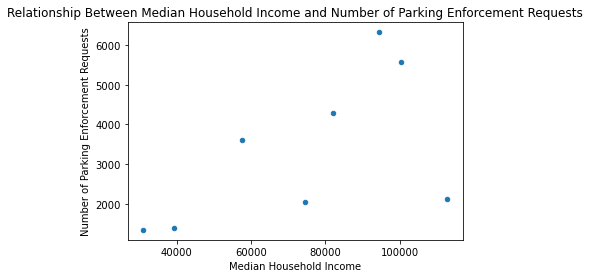

In [14]:
merged_data.plot.scatter(x='MedianHHincome',y='Number of Parking Enforcement Requests per Ward')
plt.xlabel("Median Household Income")
plt.ylabel("Number of Parking Enforcement Requests")
plt.title("Relationship Between Median Household Income and Number of Parking Enforcement Requests")

The scatterplot above show the relationship between median household income and number of parking enforcement requests
per ward. After reviewing the graph, the data shows that wards with a high median household income have a high amount of 
parking enforcement requests. In addition, low median household incomes have a low amount of parking enforcement requests 
per ward. 

Text(0.5, 1.0, 'Relationship Between Mean Household Income and Number of Parking Enforcement Requests')

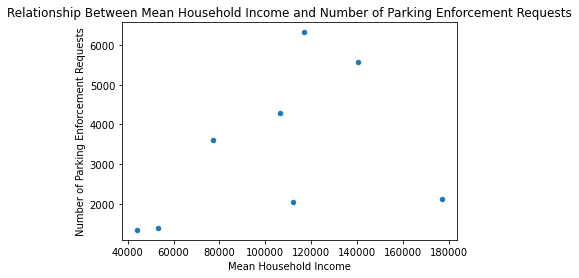

In [15]:
merged_data.plot.scatter(x='MeanHHincome',y='Number of Parking Enforcement Requests per Ward')
plt.xlabel("Mean Household Income")
plt.ylabel("Number of Parking Enforcement Requests")
plt.title("Relationship Between Mean Household Income and Number of Parking Enforcement Requests")

The scatterplot above shows the relationship between the average household income and number of parking enforcement requests per ward. The data shows that average household incomes that is greater than 110000 have a high amount of parking enforcement requests. In addition, low average household incomes have a low amount of parking enforcement requests. The scatterplot is similar to the scatterplot representing the relationship of median household incomes. Both scatterplots shows that there is association between average/median household incomes and the number of parking 
enforcement requests. 